In [60]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
%matplotlib inline

For this challenge I will be following the steps below:
    1. Data Exploration
    2. Data Preprocessing
    3. Sentiment Analysis

In [91]:
train = pd.read_table('train.tsv')
test = pd.read_table('test.tsv')

lets explore the data first


In [65]:
train.columns

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [66]:
train.dtypes

PhraseId       int64
SentenceId     int64
Phrase        object
Sentiment      int64
dtype: object

The 'Phrase' columns is the only column of type object. From simply eyeballing the column names, it looks like we have sentence and phrase level features. Lets isolate each column and look at its contents. 

In [67]:
train.PhraseId.head()

0    1
1    2
2    3
3    4
4    5
Name: PhraseId, dtype: int64

In [68]:
train.SentenceId.head()

0    1
1    1
2    1
3    1
4    1
Name: SentenceId, dtype: int64

In [69]:
train.Phrase.head()

0    A series of escapades demonstrating the adage ...
1    A series of escapades demonstrating the adage ...
2                                             A series
3                                                    A
4                                               series
Name: Phrase, dtype: object

The PhraseId and the Phrase columns have a taxonomy from the looks of it. The first two rows in Phrase look identical. Lets examine them.

In [70]:
train.Phrase[0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [71]:
train.Phrase[1]

'A series of escapades demonstrating the adage that what is good for the goose'

Ah. Looks like the two phrases are indeed different. Lets examine the PhraseId and the SentenceId of each of the two sentences.

In [72]:
train.SentenceId[0]

1

In [74]:
train.SentenceId[1]

1

In [75]:
train.PhraseId[0]

1

In [76]:
train.PhraseId[1]

2

In [77]:
train.Sentiment.head()

0    1
1    2
2    2
3    2
4    2
Name: Sentiment, dtype: int64

They share the same sentence ID which means that the phrases are from the same sentence. The 'Sentiment' column is the sentiment that we need to predict.

The objective of the challenge is to build a classifier for this data. The training input here will be the Phrases and the variable to be predicted will be the sentiment. 

In [78]:
train.Sentiment.describe()

count    156060.000000
mean          2.063578
std           0.893832
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Sentiment, dtype: float64

In [79]:
train.Sentiment.unique()

array([1, 2, 3, 4, 0])

In [80]:
train.Sentiment.count()

156060

There are a total of 156060 sentiment values ranging from 0 to 4. The distribution is as follows:

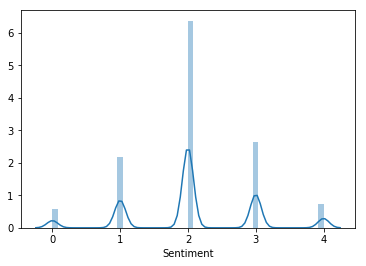

In [82]:
sns.distplot(train.Sentiment)

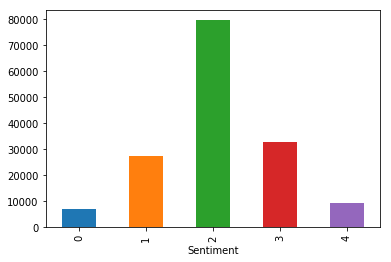

In [84]:
x = train.groupby(['Sentiment'])['PhraseId'].count()
x.plot.bar()

In [85]:
x

Sentiment
0     7072
1    27273
2    79582
3    32927
4     9206
Name: PhraseId, dtype: int64

Lets visualize the word distribution in the data. 

For the sake of wordclouds, we visualize the most common words in a sentiment class.

In [86]:
sentiment = train.groupby("Sentiment")

In [98]:
sentiment.mean().sort_values(by="PhraseId",ascending=False).head()

,PhraseId,SentenceId
Sentiment,,
0,81035.048784,4241.946126
1,80495.252447,4216.860265
4,80052.598197,4189.713448
3,78409.828378,4098.831597
2,76527.962441,3997.699090


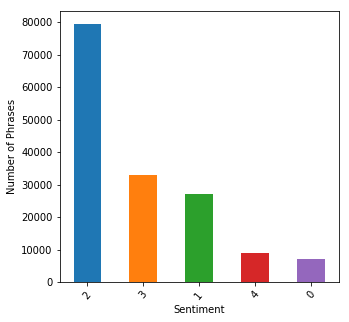

In [99]:
plt.figure(figsize=(5,5))
sentiment.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Sentiment")
plt.ylabel("Number of Phrases")
plt.show()

sentiment 2 has the most number of sentences in the dataset.

The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

In [95]:
import re

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

train_clean = preprocess_reviews(train.Phrase)
test_clean = preprocess_reviews(test.Phrase)

In [97]:
train_clean

['a series of escapades demonstrating the adage that what is good for the goose is also good for the gander  some of which occasionally amuses but none of which amounts to much of a story ',
 'a series of escapades demonstrating the adage that what is good for the goose',
 'a series',
 'a',
 'series',
 'of escapades demonstrating the adage that what is good for the goose',
 'of',
 'escapades demonstrating the adage that what is good for the goose',
 'escapades',
 'demonstrating the adage that what is good for the goose',
 'demonstrating the adage',
 'demonstrating',
 'the adage',
 'the',
 'adage',
 'that what is good for the goose',
 'that',
 'what is good for the goose',
 'what',
 'is good for the goose',
 'is',
 'good for the goose',
 'good',
 'for the goose',
 'for',
 'the goose',
 'goose',
 'is also good for the gander  some of which occasionally amuses but none of which amounts to much of a story ',
 'is also good for the gander  some of which occasionally amuses but none of which